# Computational Economics and Nonlinear Modeling (4)

## Rational Expectations Models

PSE Summer School, 2017

Pablo Winant

## Example: Stochastic Neoclassical Model

Productivity $z_t = \rho z_{t-1} + \epsilon_t$

Capital law of motion: $k_t = (1-\delta) k_{t-1} + i_{t-1}$.

Production: $y_t = f(k_t) = z_t {k_t}^{\alpha}$

Consumption: $c_t = y_t - i_t$

Optimal investment determined by maximization program, given $k_0 = \overline{k}$: 

$$ \max_{0 \leq i_t \leq y_t} \sum_t \beta^t \frac{\left( c_t \right)^{1-\gamma}}{1-\gamma} $$

Bellman formulation:

$$V(z_t, k_t) = \max_{0 \leq i_t \leq y_t} \frac{\left( c_t \right)^{1-\gamma}}{1-\gamma}  + \beta E_{z_t} \left[ V(z_{t+1}, k_{t+1}) \right]$$

with:
$$k_{t+1} = (1-\delta) k_{t} + i_{t}$$

Euler equation: $$\beta E_t \left[  \left( \frac{c_{t+1}}{c_t} \right)^{-\gamma} \left( \alpha \frac{y_t}{k_t} + (1-\delta) \right) \right] \leq 1 \perp 0\leq i_t$$



What is the state-space ?
   - Minimal information to determine decisions at date $t$

Here:
   - exogenous states: $m_t=(z_t)$
   - endogenous states: $s_t=(k_t)$
   - controls: $x_t=(i_t)$
   - auxiliary variables: $y_t=(y_t, c_t)$

General notations:

- transitions:
    $$ s_t = {\color{red} g} \left( m_{t-1}, s_{t-1}, x_{t-1}, m_t \right)$$
    
- Bellman:

    $$V(m_t, s_t) = \max_{\underline{x} \leq x_t \leq \overline{x}} {\color{red} U}\left(m_t, s_t, x_t\right) + {\color{blue} \beta} E_{m_t} V\left(m_{t+1}, s_{t+1}\right)$$
    
- Euler/Equilibrium conditions:

    $$E_t \left[ {\color{red}f}\left(m_t, s_t, x_t, m_{t+1}, s_{t+1}, x_{t+1} \right) \right] = 0 \perp \underline{x}(m_t,x_t) \leq x_t \leq\overline{x}(m_t,x_t)$$

In Dolo:

- ${\color{red}g}$: transition
- ${\color{red}f}$: arbitrage
- ${\color{red}U}$: felicity
- ${\color{red}{\underline{x}}}, {\color{red}{\overline{x}}}$: controls_lb, controls_ub

Specific algorithm can use other functions:
- $z_t =E_{m_t} {\color{red}h}(m_{t+1}, s_{t+1}, x_{t+1})$: expectation
- $x_t = {\color{red}d}\left( m_t, s_t, z_t \right)$: direct_response

In [1]:
import Dolo
model = Dolo.yaml_import("notebooks/neoclassical.yaml")

name,Neoclassical
filename,neoclassical.yaml
Type,Equation
transition,\[k_{t} = 1-\delta k_{t-1}+i_{t-1}\]
felicity,\[u_{t} = \frac{\left(c_{t}\right)^{1-\gamma}}{1-\gamma}\]
arbitrage,"\[1-\beta \left(\frac{c_{t+1}}{c_{t}}\right)^{-\gamma} r_{I,t+1}\]"


Model


## The solution and the discretized model


The fixed-point of the Bellman is a *function* $V_t=V(z_t,k_t)$.

The decision rule $i_t=i(z_t, k_t)$ is also a *function* $\varphi: (m_t, s_t)\rightarrow x_t$

Denote by $\mathcal{S} = \{(m,s)\}$ the state-space
Decision rules defined over $\mathcal{S}$ live in an infinite dimensional space $\mathcal{D}$

If $\mathcal{S}$ is compact, then $\mathcal{D}$ is complete.

### Discretize the state-space:

- $G_m$: grid for exogenous process
    - example: $z_i = (2\frac{i}{N_m-1}-1)\sigma_{z,\infty} $
    - general: $(m_1, ..., m_{N_m})$ (2d matrix)
- $G_s$  grid for endogenous states
    - example: $k_i = \underline{k} + \frac{i}{N_s-1}(\overline{k}- \underline{k})$
    - general $\left(s_1, ..., s_{N_s}\right)$  (2d matrix)
- $G = G_m \otimes G_s $: grid for endogenous states
    - general $\left(m_i, s_j\right)_{ij}$  (2d matrix)


In [76]:
# model.exogenous
# model.grid
# dp = Dolo.discretize(model.exogenous)
# Dolo.nodes( Dolo.discretize(model.exogenous).grid)
# Dolo.nodes(grid)
# dr = Dolo.DecisionRule(dp.grid, model.grid, 2)


Dolo.DecisionRule{Dolo.CartesianGrid,Dolo.CartesianGrid}


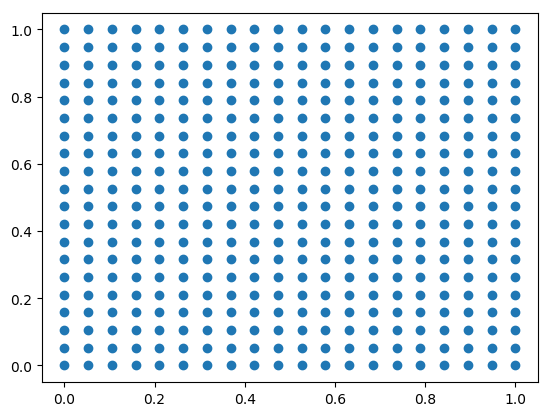

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd963b8d278>

In [99]:
import PyPlot
grid = Dolo.CartesianGrid([0.0, 0.0], [1.0, 1.0], [20, 20])
nodes = Dolo.nodes(grid)
PyPlot.plot(nodes[:,1],nodes[:,2],"o")
# grid = Dolo.SmolyakGrid([0.0, 0.0], [1.0, 1.0], 3)
# nodes = Dolo.nodes(grid)
# PyPlot.plot(nodes[:,1],nodes[:,2],"o")

### Approximate the solution

When $G_s$ and $G_m$ have a simple geometry, we can interpolate (extrapolate?) to approximate smooth functions.

A function on G is approximately characterized by values on $G$.

We identify the decision rule with the finite set of values on the grid.


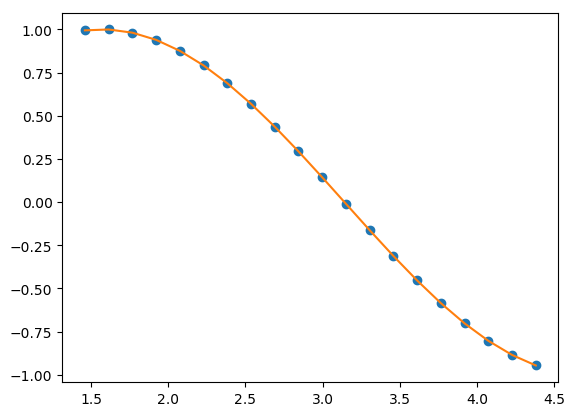

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd9638c0e80>

In [113]:
dr = Dolo.DecisionRule(dp.grid, model.grid, 1) #

s = Dolo.nodes(model.grid)
vals = sin.(s)
Dolo.set_values!(dr, [vals for i=1:Dolo.n_nodes(dp)])
PyPlot.plot(s, sin.(Dolo.nodes(model.grid)),"o")

PyPlot.plot(s, dr(1, s))

### Compute the expectations

- Traditional way (1):

    - exogenous process is iid ($\epsilon$)
    - integration nodes ($\epsilon_i$) and weights ($w_i$) are computed so that
        $$ E \left( f(\epsilon) \right ) = \sum_i w_i f(x_i)$$
    - if exogenous shock follows transition rules $m_t = \tau (m_{t-1}, \epsilon_t)$, integration nodes are given by:
        $$m_ij = \tau (m_i, \epsilon_j)$$
        
    - example ar1


### Compute the expectations (2)

- Traditional way (2):

    - approximate $m_t$ by a Markov Chain
    - example:
        - $m_t$ follows an AR1
        - Rouwenhorst/Tauchen yield matrices
             - $P$ (transitions) 
             - $Q$ (nodes)

### Compute the expectations (3)

- Fuse both approaches: Generalized Discretized Process
    
    - nodes today: $(m_i)_{i \in N_m}$
    - nodes tomorrow: $(m_{ij})_{i \in N_m, j \in K(i)} $
    - integration weights: $(w_{ij})_{i \in N_m, j \in K(i)} $
    
- Approximate expectations from each exogenous grid point:
$$ E_{m_i} \left( f(m) \right ) = \sum_i w_i f(m_{ij})$$

In [147]:
# model.exogenous
# dp1 = Dolo.discretize(Dolo.MarkovChain, model.exogenous)
# dp2 = Dolo.discretize(Dolo.DiscretizedProcess, model.exogenous)
# dp2.integration_nodes
# sol = Dolo.time_iteration(model, verbose = false)
# sol1 = Dolo.time_iteration(model, dp1, verbose = false)
# sol1.dr
# sol2 = Dolo.time_iteration(model, dp2, verbose = false)
# sol2.dr

Dolo.DecisionRule{Dolo.CartesianGrid,Dolo.CartesianGrid}


In [5]:
# btr = Dolo.perturbate(model);
# btr.solution

Dolo.BiTaylorExpansion


## Value function iteration

VFI consists in considering the updating rule $V^n \rightarrow V^{n+1}$ where:

   $$V^{n+1}(m_t, s_t) = \max_{\underline{x} \leq x_t \leq \overline{x}} {\color{red} U}\left(m_t, s_t, x_t\right) + {\color{blue} \beta} E_{m_t} V^n\left(m_{t+1}, s_{t+1}\right)$$
   
   
Good theoretical properties under *mild* assumptions on the model

    - preserves concavity of $V$
    - proof of *global* convergence used to establish existence of solution
    
Convergence is *geometric* (i.e. slow)

Decision rule is obtained from the maximization.

### Naive algorithm

- Choose a reasonable initial guess for the decision rule $x=\varphi(m,s)$
- Perform the recursion  $$V^{n+1}(m_t, s_t) = {\color{red} U}\left(m_t, s_t, x_t\right) + {\color{blue} \beta} E_{m_t} V^n\left(m_{t+1}, g(m_t, s_t, \varphi(s_t) )\right) $$
  to get initial guess $V_0$.
     - at each step one needs to determine l.h.s. for $m_t,s_t\in \mathcal{G}$
- Perform the iterations:
    $$V^{n+1}=\max_{x^{n+1}} ... + V^{n}(...)$$
    - stop when $|V^n-V^{n+1}|<\kappa$ or $|x_{n+1}-x_n|<\eta$
  

### VFI: Naive algorithm (2)

- Maximization $$V^{n+1}=\max_{x^{n+1}} ... +  \beta  V^{n}(...)$$ can be done:
    - by grid search (DSS method): quick if vectorized  
    - with nonlinear solver (golden ratio, Newton, Nelder-Mead, etc.)

- This step is expensive:
    - grid search becomes quickly infeasible when there are many controls
    - nonlinear solver is typically slow because one iterates of all states nodes


### VFI: Howard Improvements

Alternate two operations:

- Value improvement: $\tilde{V}^{n+1}=\max_{x^{n+1}} ... +  \beta  V^{n}(...)$
    - yields $\tilde{V}^{n+1}$ and $x^{n+1}$
- Policy evaluation:     given $x^{n+1}$ find the fixed point $V^{n+1}$ of 
    ${V}^{k+1}= U + \beta E\left[V^{k}(...)\right]$
    - involves easy computions
    - remark (1): might be quicker to not reach full convergence
    - remark (2): it is a linear system in the values of $V^{n+1}$
    
Convergence of $V_n$ is quadratic (i.e. fast)

In [12]:
# show verbose output

### Other variants

Enveloppe condition

Reinforcement learning

## Time Iteration Algorithms

- Euler equation  (can be reformulated to remove complementarities)

$$E_t \left[ {\color{red}f}\left(m_t, s_t, x_t, m_{t+1}, s_{t+1}, x_{t+1} \right) \right] $$


- Replace decision rule to get $\forall m_t, s_t$

$$F(m_t, s_t) = E_t \left[ {\color{red}f}\left(m_t, s_t, \varphi(m_t, s_t), m_{t+1}, s_{t+1}, \tilde{\varphi}(m_{t+1}, s_{t+1}) \right) \right] =0 $$
with 
$$s_{t+1} = g(m_t, s_t, \varphi(m_t, s_t))=0$$

- $\varphi$ (resp. $\tilde{\varphi}$) is the decision rule followed today (resp. tomorrow)
- given $\tilde{\varphi}$, the time iteration find $\varphi$ such that $F$ is zero

Equilibrium conditions

- two-countries model
- NK model
- complementarities

### Time Iterations

- Denote by $\mathbf{x}=(x_{i,n,i_x})$ the controls on the grid $\mathcal{G}$
- Denote by $\mathbf{\tilde{x}}$ the controls on the grid for tomorrow's decision rule
- Residuals on the grid: $F(\mathbf{x}, \mathbf{\tilde{x}})$ (same dim as $\mathbf{x}$)
- Algo:
    - start with $\mathbf{x_0}$
    - given $\mathbf{x_n}$ solve nonlinarly for $\mathbf{x_{n+1}}$ such that $F(\mathbf{x_{n+1}}, \mathbf{x_{n}})=0$
        - (easy because the system is sparse)
    - stop when $\eta_n=|\mathbf{x_{n+1}}-\mathbf{x_n}| <\eta$
    - watch $\lambda_n=\frac{\eta_{n+1}}{\eta_{n}}$ (should be $<\lambda<1$)

In [16]:
Dolo.time_iteration(model, verbose=false);

Remarks:

- convergence is geometric (slow)
- vectorization is more efficient hence faster than VFI
    - scales better
- the existence/unicity results are more complicated
    - not necessarly implied by convergence of VFI
    - sometimes there is no Bellman
    - $\lambda<1$ is necessary for local unicity

### Direct Time-Iterations

Sometimes we get optimal controls in closed-form as a function of expectations.
In the neoclassical example we can compute:

$$w_t = \beta E_t \left[ \left( c_{t+1} \right)^{-\gamma} \left( \alpha \frac{y_t}{k_t} + (1-\delta) \right) \right] \leq 1 \perp 0\leq i_t$$

then $$c_t = (w_t)^{\frac{-1}{\gamma}}$$

or $$i_t = \max(0, y_t -  (w_t)^{\frac{-1}{\gamma}})$$



### Direct Time-Iterations (2)

$$w_t = E \left[ h(m_{t+1}, s_{t+1}, x_{t+1} )\right]$$

$$x_t = d(m_t, s_t, w_t)$$

- Leads to faster convergence (no system to solve)
- 100% equivalent to time-iterations

In [20]:
# example

### Improved Time-Iterations

- Very new / experimental
- Up to 400 times faster than time-iterations
- Quadratic convergence for the outer loop.

- Try to solve $G(\mathbf{x}) = F(\mathbf{x},\mathbf{x})$ as a nonlinear system in $\mathbf{x}$ using a Newton algorithm.

    - complicated: involves the computation of $G^{\prime}(\mathbf{x})^{-1}.\mathbf{r}$

- Split in two: $G^{\prime}(\mathbf{x}) = F^{\prime}_\mathbf{x}(\mathbf{x}, \mathbf{x}) + F^{\prime}_\mathbf{\tilde{x}}(\mathbf{x}, \mathbf{{x}})=A_n-B_n$

    - $A_n$ is simple but $B_n$ is complicated
    
    ![alt text](notebooks/jacobian.png "Logo Title Text 1")


- Idea (1):
    - compute $$(A_n-B_n)^{-1} \mathbf{r} = \left( I + A_n^{-1}B_n + (A_n^{-1}B_n)^2 + ...  \right) A_n^{-1}\mathbf{r}$$
    - doesn't require inversion of $B_n$
    - all is needed is to compute successive terms: $\pi_k = A_n^{-1} B_n \pi_{k-1}$ with $\pi_0 = A_n^{-1}\mathbf{r}$
    - still too slow
- Idea (2):
    - one never needs to construct $B_n$ to compute $B_n.\pi_{n-1}$ (cf. linear operator)
    - interpolation must be linear w.r.t. data
    - computation of the infinite sum is very fast

- Deep parallels with Howard improvments:
    - geometric->quadratic
    - inner-loops consists in a linear system

- The same calculations from the infinite sum can be used to compute the exact spectral radius of the time iteration operator $T$, i.e. $\lambda$
such that $$|T^{\prime}(\overline{x}).\mathbf{r}| <\lambda |\mathbf{r}|$$

In [27]:
Dolo.improved_time_iteration(model)

------------------------------------------------------------------------------------------------------------------------
N	f_x		d_x	Time_residuals	Time_inversion	Time_search	Lambda_0	N_invert	N_search	
------------------------------------------------------------------------------------------------------------------------
1      1.128715e-01 5.378337e-02     1.0002         0.5560         0.00676        0.869           99               1    
2      8.331839e-03 5.972933e-03     0.0123         0.0734         0.00105        0.888           114              1    
3      1.513728e-04 1.115426e-04     0.0140         0.0640         0.00089        0.890           86               1    
4      5.694427e-08 4.053276e-08     0.0169         0.0145         0.00090        0.880           22               1    
5      2.187510e-11 5.625976e-11     0.0141         0.0009         0.00090        0.783           0                1    
------------------------------------------------------------------------

Results of Improved Time Iteration Algorithm
 * Number of iterations: 5
 * Complementarities: false
 * Decision Rule type: Dolo.DecisionRule{Dolo.CartesianGrid,Dolo.CartesianGrid}
 * Convergence: true
 * Contractivity: 0.7825863363667995
   * |x - x'| < 1.0e-08: true


## Fixed-Point Algorithms

### Parameterized Expectations

Suppose the model takes the form:


$$w_t = E \left[ h(m_{t+1}, s_{t+1}, x_{t+1} )\right]$$

$$x_t = d(m_t, s_t, w_t)$$


In this case, it might be tempting for a function $w_t = \psi(m_t, s_t)$

It might work:
- in which case it is faster if there is one expectation variable instead of many controls
- but convergence is not guaranteed and in general not equivalent to time-iterations


### Computing Expectations Just Once

A few additional assumptions:

- Transitions are non stochastic: $$s_t = g(s_{t-1}, x_{t-1})$$
- Future states are present controls $$s_{t+1}=x_t$$

There is a fixed point representation of the expectation function:

$$w_t = E \left[ h(m_{t+1}, s_{t+1}, w_{t+1} )\right] $$


Then a very fast algorithm is available to precompute integrals (Maliar and Maliar):
- but it is not guaranteed to converge

## Other algorithms

Sparse grids:
- Smolyak + polynomials (Maliar and Maliar)
- Smolyak + linear (Simon Scheidegger)

Alternatives to grids:
- Galerkin
- Regressions
    - PEA (original)
    - GSSA

Not implemented yet but upcoming (see Python side)

